# Enhanced Fish Tank Reinforcement Learning Training

This notebook provides an enhanced training environment for the fish tank RL problem with:

- Improved training algorithms (A2C)
- Better visualization and monitoring
- Model saving/loading capabilities
- Performance comparison tools

The implementation is modularized into utility files for better maintainability.

In [ ]:
# Install required packages if needed
# !pip install torch gymnasium matplotlib numpy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import random
import warnings

# Import our utilities
from utils import (
    FishTankEnv, WaterCurrent, ActorCritic, A2CLearner,
    run_training_visualization, test_trained_model,
    SEED
)

# Notebook friendliness
plt.ion()
warnings.filterwarnings("ignore", category=UserWarning, message=".*cache_frame_data.*")

# Set random seeds for reproducibility
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

print("All imports successful!")
print("Fish Tank RL environment ready for training.")

All imports successful!
Fish Tank RL environment ready for training.


## Quick Environment Test

Let's test the environment to make sure everything is working:

In [ ]:
# Test the environment
env = FishTankEnv()
obs = env.reset()

print(f"Environment created successfully!")
print(f"Observation space: {env.obs_dim} dimensions")
print(f"Action space: {env.act_dim} dimensions")
print(f"Initial observation: {obs}")
print(f"Fish position: {env.position}")
print(f"Number of currents: {len(env.currents)}")

# Take a random step
action = np.random.uniform(-1, 1, env.act_dim)
next_obs, reward, done, info = env.step(action)
print(f"\nAfter random action {action}:")
print(f"New observation: {next_obs}")
print(f"Reward: {reward:.4f}")
print(f"Done: {done}")

## Start Training with Live Visualization

Run this cell to start training the fish agent with real-time visualization. The training will run in a background thread while showing:

- Fish movement in the tank
- Water currents (cyan circles and arrows)
- Training metrics (reward and distance to center)

**Note:** Close the plot window to stop training and save the best model.

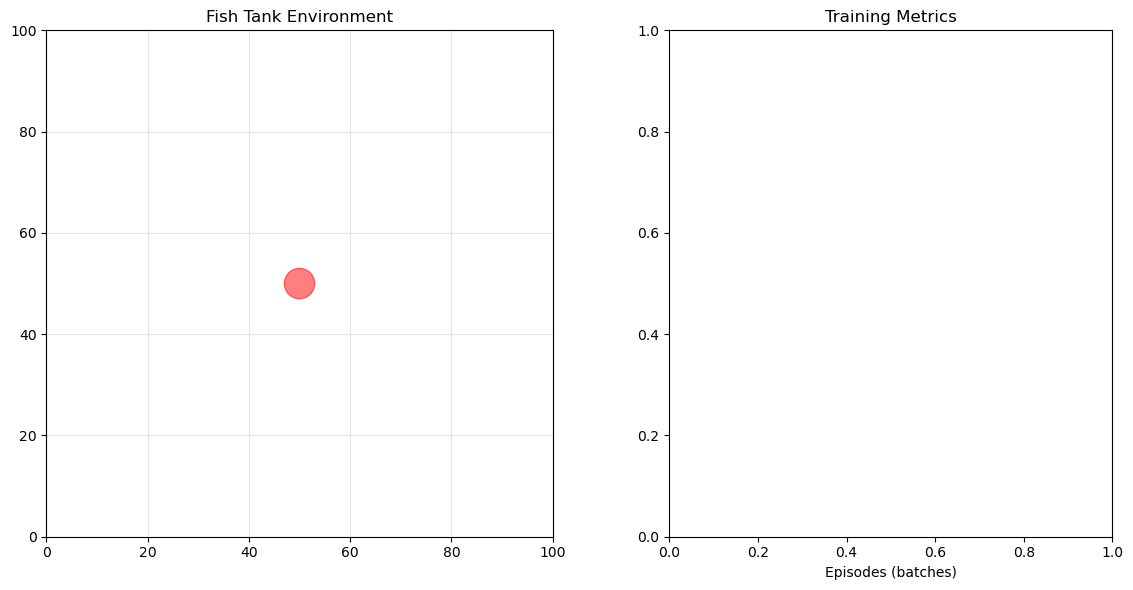

Best model saved! Mean return: -41.30

Training completed!
Total episodes trained: 1
Best average return: -41.30


/opt/anaconda3/lib/python3.11/site-packages/matplotlib/animation.py:892: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [3]:
# Start training with visualization
learner = run_training_visualization()

print("\nTraining completed!")
print(f"Total episodes trained: {learner.episode_count}")
print(f"Best average return: {learner.best_return:.2f}")

## Test the Trained Model

Visualize how well the trained fish performs by showing multiple episode trajectories:

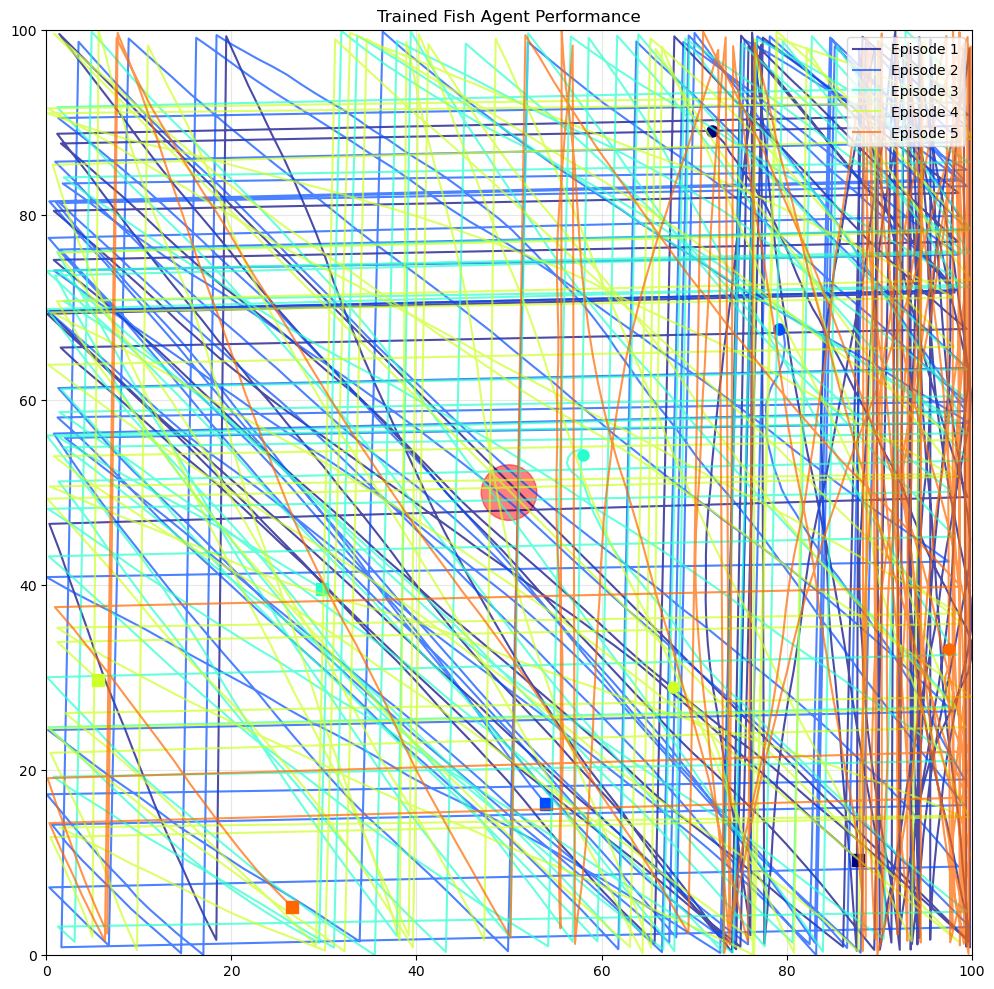

In [4]:
# Test the trained model
if 'learner' in locals():
    test_trained_model(learner, num_episodes=5)
else:
    print("No trained model available. Please run the training cell first.")

## Load and Test a Saved Model

If you have a previously saved model, you can load and test it:

In [ ]:
# Load a saved model
try:
    # Create a new learner and load the saved model
    saved_learner = A2CLearner()
    saved_learner.load_model('best_fish_policy.pt')
    
    print("Successfully loaded saved model!")
    
    # Test the loaded model
    test_trained_model(saved_learner, num_episodes=3)
    
except FileNotFoundError:
    print("No saved model found. Train a model first to create 'best_fish_policy.pt'")
except Exception as e:
    print(f"Error loading model: {e}")

## Manual Training (Without Visualization)

For faster training without visualization, you can train manually:

In [5]:
# Manual training without visualization
manual_learner = A2CLearner()

print("Starting manual training...")
print("Training for 10 steps (this may take a while)")

for step in range(10):
    manual_learner.train_step()
    
    if step % 2 == 0:  # Print every 2 steps
        mean_return = np.mean(manual_learner.ep_returns) if manual_learner.ep_returns else 0
        print(f"Step {step+1}/10 - Episodes: {manual_learner.episode_count}, Mean Return: {mean_return:.2f}")

print("\nManual training completed!")
print(f"Final episodes: {manual_learner.episode_count}")
print(f"Best return: {manual_learner.best_return:.2f}")

# Save the manually trained model
manual_learner.save_model('manual_fish_policy.pt')
print("Model saved as 'manual_fish_policy.pt'")

Starting manual training...
Training for 10 steps (this may take a while)
Step 1/10 - Episodes: 1, Mean Return: -40.56
Step 3/10 - Episodes: 3, Mean Return: -38.50
Step 5/10 - Episodes: 5, Mean Return: -42.03
Step 7/10 - Episodes: 7, Mean Return: -46.29
Step 9/10 - Episodes: 9, Mean Return: -44.93

Manual training completed!
Final episodes: 10
Best return: -29.56
Model saved as 'manual_fish_policy.pt'


## Environment Analysis

Let's analyze the environment and understand the fish's behavior:

In [7]:
# Analyze environment dynamics
env = FishTankEnv()

# Test different actions and their effects
test_actions = [
    [0, 0],      # No action
    [1, 0],      # Right
    [-1, 0],     # Left  
    [0, 1],      # Up
    [0, -1],     # Down
    [0.5, 0.5],  # Diagonal
]

print("Testing different actions:")
print("Action\t\tReward\t\tNew Position")
print("-" * 50)

for action in test_actions:
    obs = env.reset()
    initial_pos = env.position.copy()
    
    next_obs, reward, done, info = env.step(np.array(action))
    
    print(f"{str(action):12}\t{reward:8.4f}\t{env.position}")

print("\nCurrent positions and strengths:")
for i, current in enumerate(env.currents):
    print(f"Current {i+1}: pos={current.position:.1f}, strength={current.strength:.1f}")

Testing different actions:
Action		Reward		New Position
--------------------------------------------------
[0, 0]      	 -0.0934	[ 0.87060632 39.60419159]
[1, 0]      	 -0.0937	[59.83726648  0.54073087]
[-1, 0]     	 -0.0892	[91.80286514 32.61991799]
[0, 1]      	 -0.0312	[56.39059394 24.01551001]
[0, -1]     	 -0.0677	[15.75086381 48.00581962]
[0.5, 0.5]  	 -0.0937	[37.21959999 98.92572401]

Current positions and strengths:


TypeError: unsupported format string passed to numpy.ndarray.__format__

## Experiment with Hyperparameters

You can modify the constants and retrain to see how different settings affect performance:

In [8]:
# Example: Create environment with different settings
from utils.constants import *

print("Current hyperparameters:")
print(f"Tank size: {TANK_SIZE}")
print(f"Max velocity: {MAX_VELOCITY}")
print(f"Max force: {MAX_FORCE}")
print(f"Current count: {CURRENT_COUNT}")
print(f"Current strength: {MAX_CURRENT_STRENGTH}")
print(f"Episode length: {EPISODE_LEN}")
print(f"Batch size: {BATCH_SIZE}")
print(f"Learning rate: {POLICY_LR}")

print("\nTo modify these, edit the values in utils/constants.py and restart the kernel.")

Current hyperparameters:
Tank size: 100.0
Max velocity: 30.0
Max force: 10.0
Current count: 2
Current strength: 12.0
Episode length: 1000
Batch size: 1024
Learning rate: 0.0003

To modify these, edit the values in utils/constants.py and restart the kernel.
